<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#00A8E1;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:#000000;
              text-align:center;'>
        <b>AMAZON PRIME DATA VISUALIZATION</b>
    </h3>
</div>
<h3>Amazon Prime Video - Film dan Acara TV</h3>

Amazon Prime adalah salah satu platform streaming media dan video yang paling populer. Mereka memiliki hampir 10.000 film atau acara TV yang tersedia di platform mereka, pada pertengahan tahun 2021, mereka memiliki lebih dari 200 juta Pelanggan di seluruh dunia. Dataset tabular ini terdiri dari daftar semua film dan acara TV yang tersedia di Amazon Prime, bersama dengan detail seperti - pemeran, sutradara, peringkat, tahun rilis, durasi, dll.*

Data ini sudah dilakukan cleaning menggunakan <a href='https://docs.google.com/spreadsheets/d/1TKi0T-Pzt5jDs_NJhPWj3hm29Ay8HEdh3SG6TRpUouM/edit?usp=sharing' style='text-decoration:none'> GoogleSheet</a>, sehingga hasil data yang sudah di cleaning tersebut dapat digunakan untuk analisa lebih lanjut maupun dibuatkan kedalam bentuk Data Visual.
<br> 

<h3>Interesting Task Ideas</h3>
<p>
    <b>- Memahami konten yang tersedia di berbagai negara</b>
</p>
<p>
    <b>- Mengidentifikasi konten serupa dengan mencocokkan fitur berbasis teks</b>
</p>
<p>
    <b>- Apakah Amazon Prime lebih fokus pada Acara TV daripada film dalam beberapa tahun terakhir.</b>
</p>
<p>
    <b>- Melihat berapa banyak kategori untuk Film atau Acara TV.</b>
</p>
<p>
    <b>- Menganalisa 2 Negara yang paling banyak mengeluarkan konten Film atau Acara TV</b>
</p>


Refrensi dataset dapat diakses pada link berikut <a href='https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows' style='text-decoration:none'>Amazon Prime Movies and TV Shows</a>.

In [10]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

# load data
df = pd.read_csv('datasets/data_amazon_prime.csv', encoding='ISO-8859-1')

# memberikan ringkasan statistik dasar dari kolom-kolom numerik
df_description = df.describe()

# penambahan untuk memerika nilai yang hilang
missing_values = df.isnull().sum()
unique_counts = df.nunique()

# menampilkan baris pertama yang ada pada dalam Dataframe
df.head()

,show_id,type,title,country,release_year,rating,listed_in,description,country_1,country_2,country_3,country_4,country_5,country_count,listed_in_1,listed_in_2,listed_in_3,listed_in_4,typeyears
0,s2,Movie,Take Care Good Night,India,2018,13+,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,India,NaN,NaN,NaN,NaN,1,Drama,International,NaN,NaN,Movie2018
1,s24,TV Show,ZeroZeroZero,Italy,2020,18+,TV Shows,ZeroZeroZero series follows the journey of a c...,Italy,NaN,NaN,NaN,NaN,1,TV Shows,NaN,NaN,NaN,TV Show2020
2,s28,TV Show,Z: The Beginning of Everything,United States,2017,18+,"Comedy, Drama","""Z: The Beginning of Everything"" tells the sto...",United States,NaN,NaN,NaN,NaN,1,Comedy,Drama,NaN,NaN,TV Show2017
3,s67,TV Show,Worlds Toughest Race: Eco-Challenge Fiji,United States,2020,13+,Unscripted,66 teams descend upon Fiji to compete in the m...,United States,NaN,NaN,NaN,NaN,1,Unscripted,NaN,NaN,NaN,TV Show2020
4,s85,TV Show,Wishenpoof,United States,2019,ALL,Kids,"Bianca is just like any other little girl, exc...",United States,NaN,NaN,NaN,NaN,1,Kids,NaN,NaN,NaN,TV Show2019


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#00A8E1;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:#000000;
              text-align:center;'>
        <b>DATA INFORMATION</b>
    </h3>
</div>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        593 non-null    object
 1   type           593 non-null    object
 2   title          593 non-null    object
 3   country        593 non-null    object
 4   release_year   593 non-null    int64 
 5   rating         593 non-null    object
 6   listed_in      593 non-null    object
 7   description    593 non-null    object
 8   country_1      593 non-null    object
 9   country_2      99 non-null     object
 10  country_3      31 non-null     object
 11  country_4      11 non-null     object
 12  country_5      5 non-null      object
 13  country_count  593 non-null    int64 
 14  listed_in_1    593 non-null    object
 15  listed_in_2    406 non-null    object
 16  listed_in_3    182 non-null    object
 17  listed_in_4    16 non-null     object
 18  typeyears      593 non-null   

In [12]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y)).round(2)

setx_ratio = pd.DataFrame(r).T

x.head()

type
Movie      490
TV Show    103
Name: type, dtype: int64

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#00A8E1;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:#000000;
              text-align:center;'>
        <b>EXPLORATORY DATA ANALYSIS</b>
    </h3>
</div>

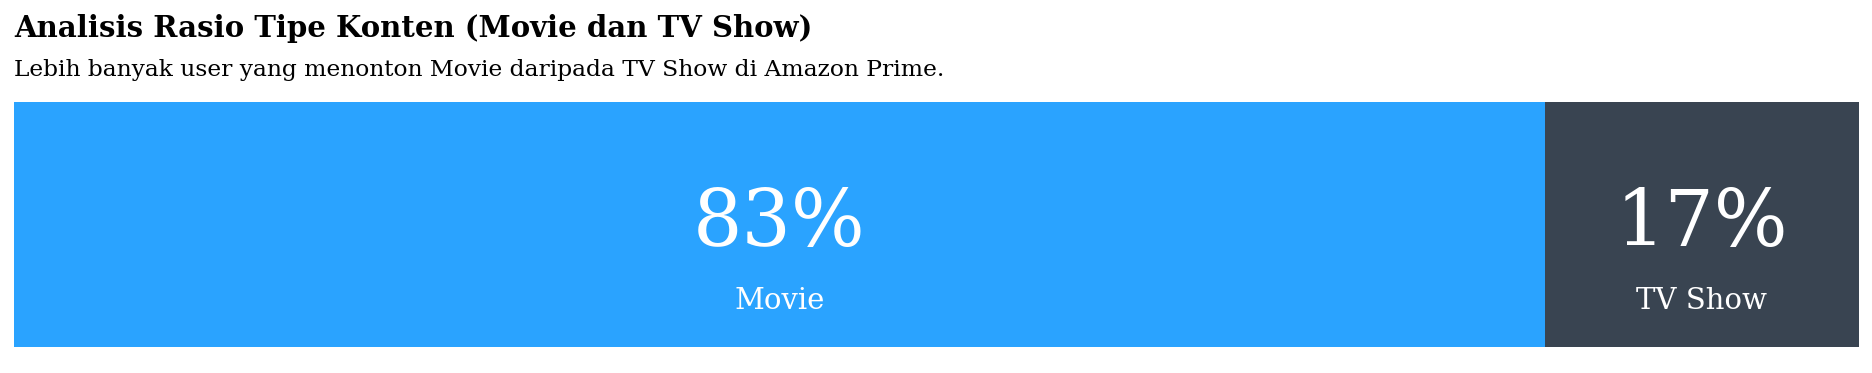

In [13]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y)).round(2)

setx_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(17, 2.5))

ax.barh(setx_ratio.index, setx_ratio['Movie'], 
        color='#1399FF', alpha=0.9, label='Male')
ax.barh(setx_ratio.index, setx_ratio['TV Show'], left=setx_ratio['Movie'], 
        color='#232F3E', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# membuat data persentase untuk TV Show
for i in setx_ratio.index:
    ax.annotate(f"{int(setx_ratio['TV Show'][i]*100)}%", 
                   xy=(setx_ratio['Movie'][i]+setx_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(setx_ratio['Movie'][i]+setx_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
# membuat data persentase untuk Movie
for i in setx_ratio.index:
    ax.annotate(f"{int(setx_ratio['Movie'][i]*100)}%", 
                   xy=(setx_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(setx_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')



# Membuat Title & Subtitle
fig.text(0.125,1.03,'Analisis Rasio Tipe Konten (Movie dan TV Show)', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'Lebih banyak user yang menonton Movie daripada TV Show di Amazon Prime.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# menghapus label
ax.legend().set_visible(False)
plt.show()

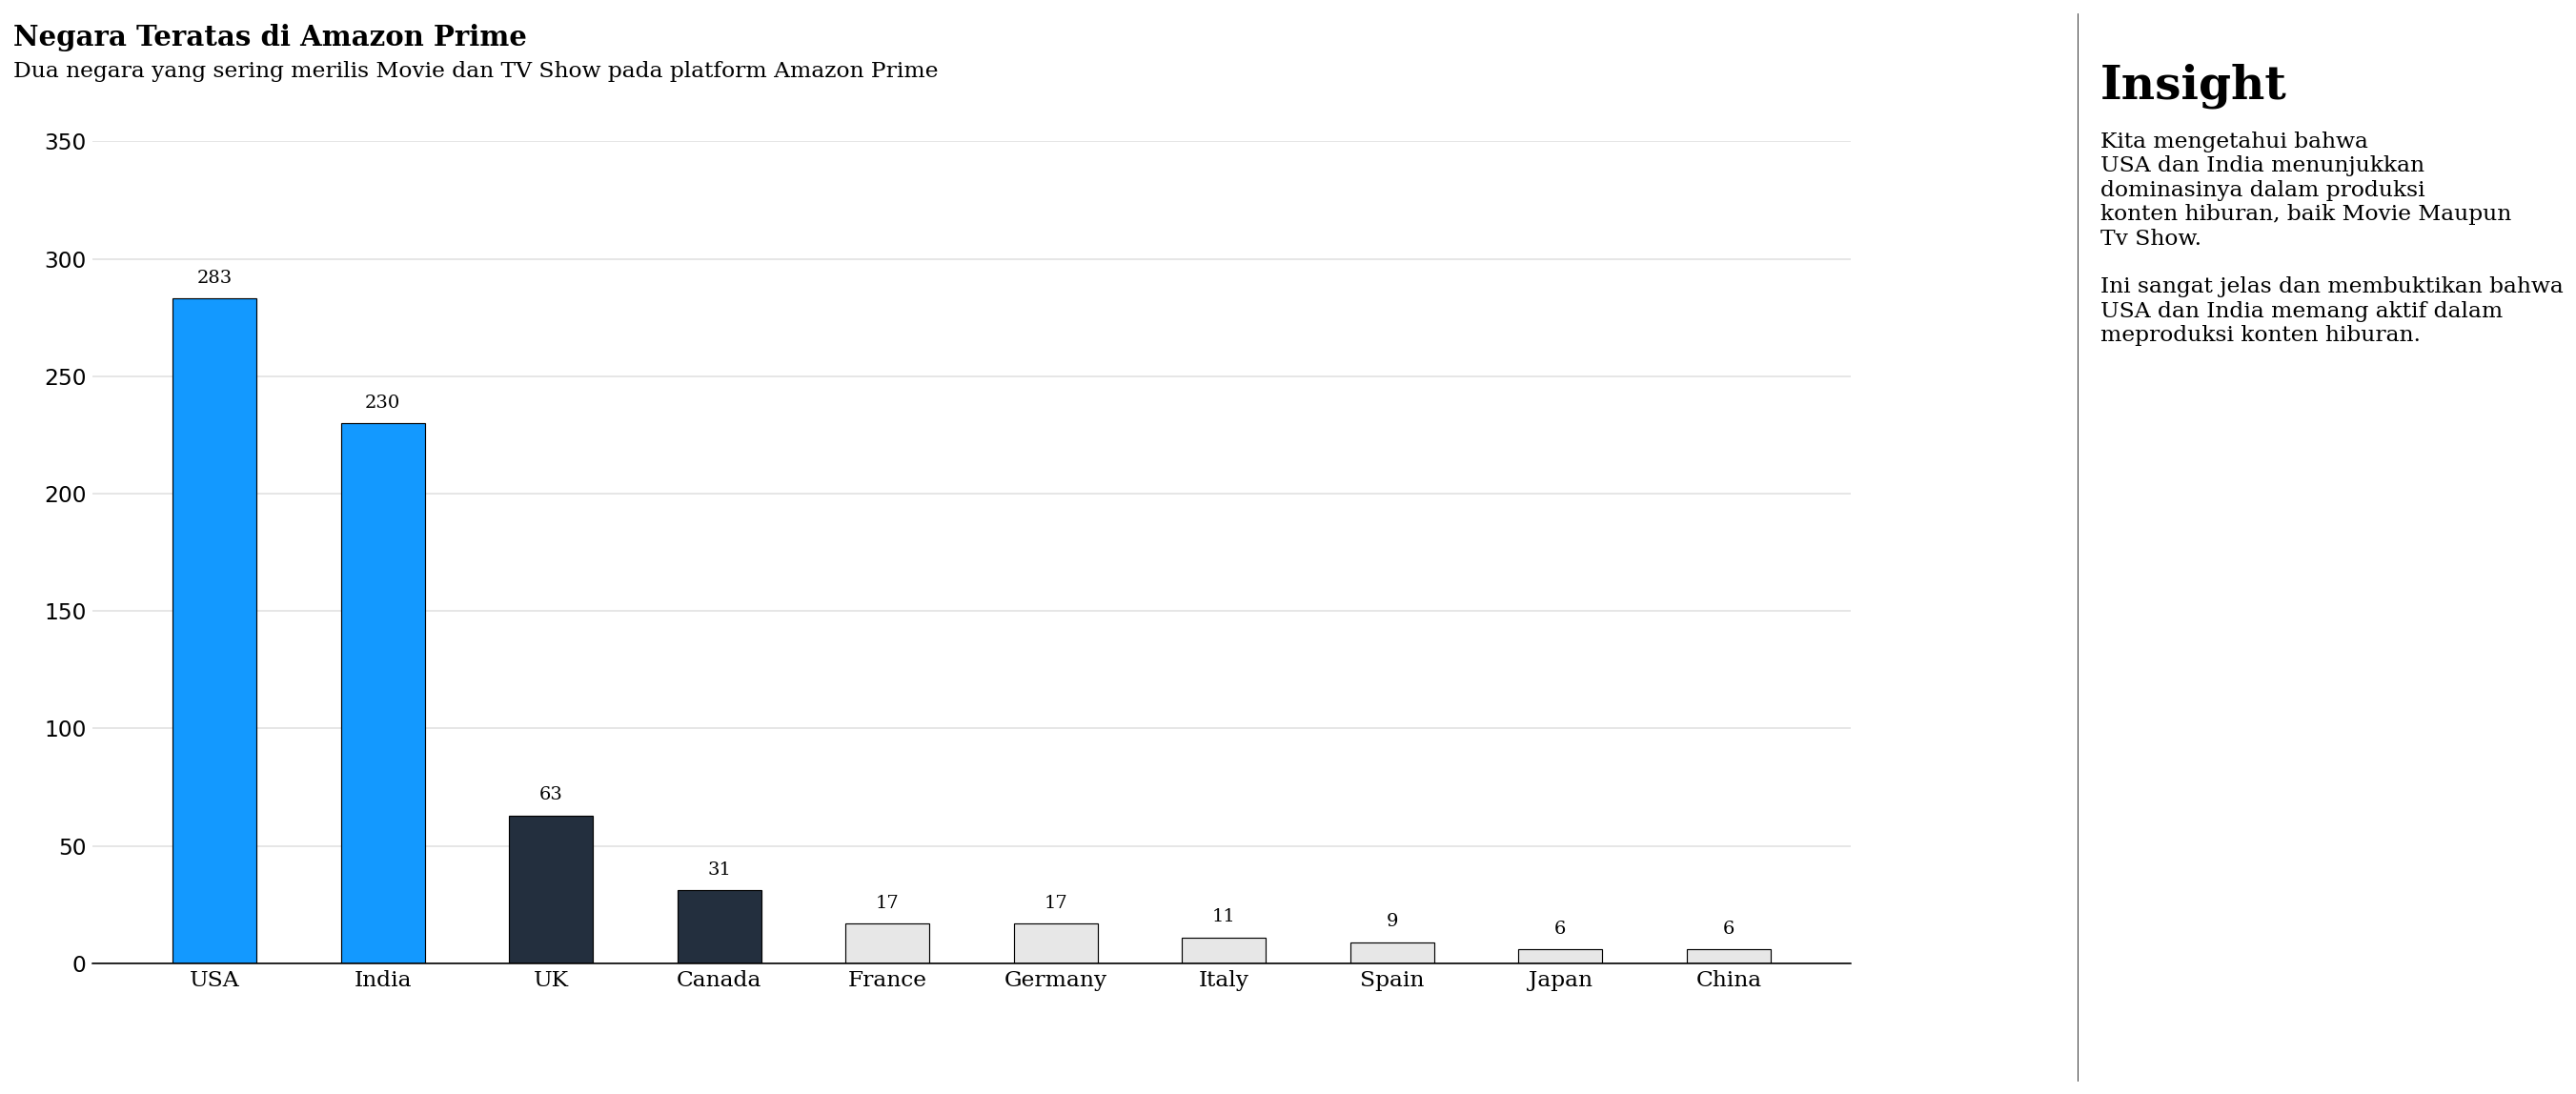

         type country_type first_country
0       Movie    country_1         India
1     TV Show    country_1         Italy
2     TV Show    country_1           USA
3     TV Show    country_1           USA
4     TV Show    country_1           USA
...       ...          ...           ...
2960    Movie    country_5           NaN
2961    Movie    country_5           NaN
2962    Movie    country_5           NaN
2963    Movie    country_5           NaN
2964    Movie    country_5           NaN

[2965 rows x 3 columns]


In [14]:
# Menggabungkan beberapa data dari berbagaimacam kolom
df_melted = df.melt(id_vars=['type'], value_vars=['country_1', 'country_2', 'country_3', 'country_4', 'country_5'],
                    var_name='country_type', value_name='first_country')

# Mengganti nama negara dalam string
df_melted['first_country'].replace('United States', 'USA', inplace=True)
df_melted['first_country'].replace('United Kingdom', 'UK',inplace=True)
df_melted['first_country'].replace('South Korea', 'S. Korea',inplace=True)

# Mengelompokkan berdasarkan negara pertama (first_country) dan jenis konten (type)
df_cntry_sum = df_melted.groupby(['first_country', 'type']).size().unstack(fill_value=0).reset_index()

# Menambahkan kolom total untuk mengurutkan berdasarkan total konten (Movie + TV Show)
df_cntry_sum['total'] = df_cntry_sum['Movie'] + df_cntry_sum['TV Show']

# Mengurutkan berdasarkan kolom total, descending (terbesar ke terkecil), lalu pilih 10 baris teratas
df_cntry_sum = df_cntry_sum.sort_values(by='total', ascending=False).head(10)

# Reset index setelah sort
df_cntry_sum.reset_index(drop=True, inplace=True)

df_cntry_sum.set_index('first_country', inplace=True)

# Menghitung total count_movie dan count_tv_show
data = df_cntry_sum[['Movie', 'TV Show']].sum(axis=1)

# Plotting data
fig, ax = plt.subplots(1, 1, figsize=(17, 8))

# Pilih warna untuk bar (highlight top 3)
color_map = ['#E7E7E7' for _ in range(len(data))]
color_map[0] = color_map[1] = '#1399FF'
color_map[2] = color_map[3] = '#232F3E'

# Plot bar chart
bars = ax.bar(data.index, data, width=0.5, edgecolor='black', linewidth=0.6, color=color_map)

# Annotations untuk menambahkan nilai pada setiap bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(height)}", 
                xy=(bar.get_x() + bar.get_width() / 2, height + 5),  # Jarak lebih kecil
                va='bottom', ha='center',
                fontweight='light', fontfamily='serif')

# Remove border dari plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels untuk sumbu X
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title dan sub-title
fig.text(0.09, 0.97, 'Negara Teratas di Amazon Prime', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.94, 'Dua negara yang sering merilis Movie dan TV Show pada platform Amazon Prime', fontsize=12, fontweight='light', fontfamily='serif')

# Insight tambahan
fig.text(1.01, 0.92, 'Insight', fontsize=25, fontweight='bold', fontfamily='serif')

fig.text(1.01, 0.67, '''
Kita mengetahui bahwa
USA dan India menunjukkan
dominasinya dalam produksi
konten hiburan, baik Movie Maupun
Tv Show.

Ini sangat jelas dan membuktikan bahwa
USA dan India memang aktif dalam
meproduksi konten hiburan.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

# Grid garis pada sumbu Y
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Set y-ticks agar sesuai dengan range data
grid_y_ticks = np.arange(0, max(data) + 100, 50)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.4)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

print(df_melted)

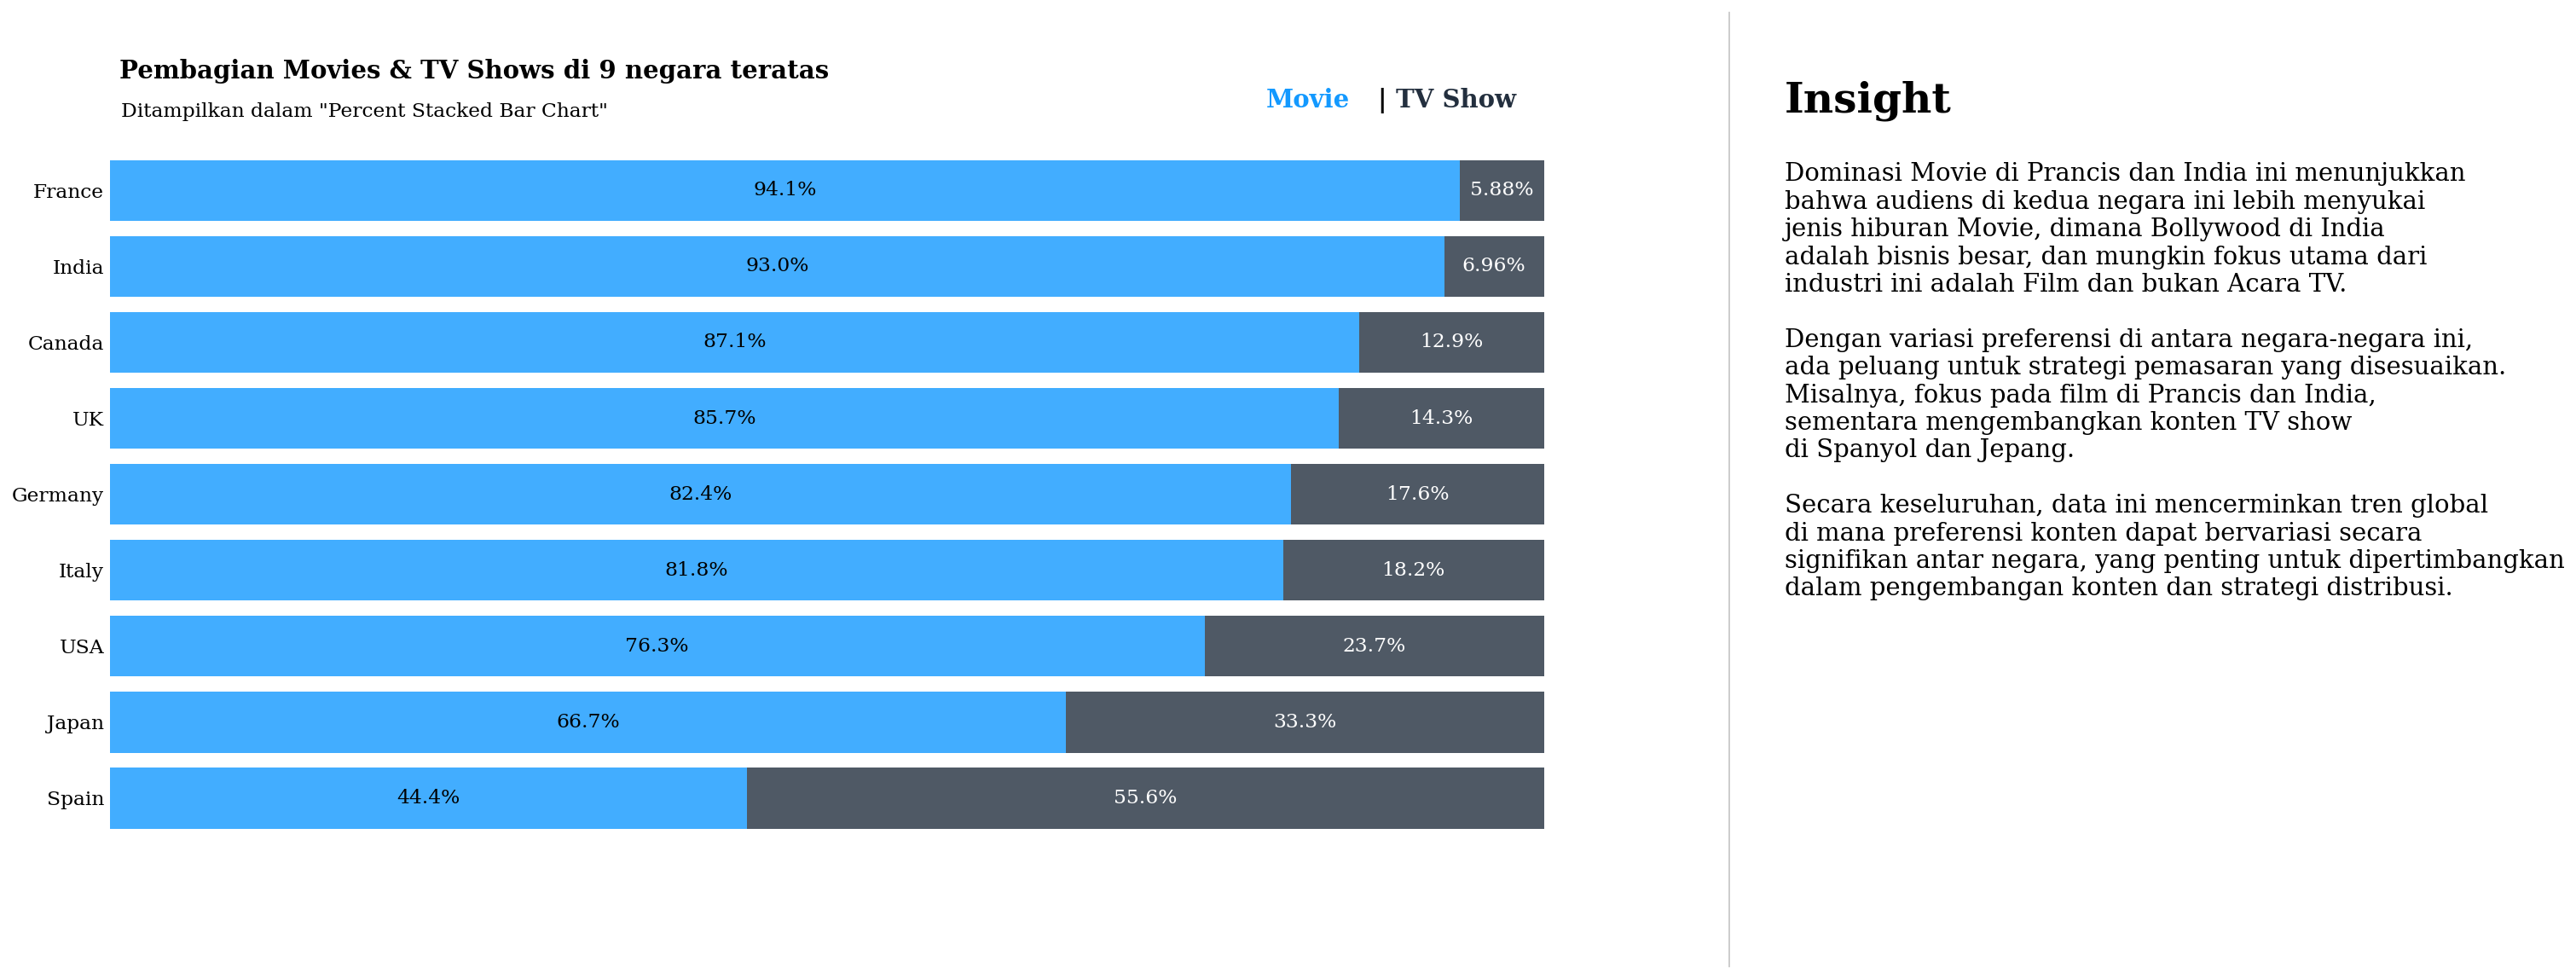

In [15]:
# Step 1: Group by 'first_country' dan 'type' untuk menghitung jumlah Movie dan TV Show per negara
dfxx = df_melted.groupby(['first_country', 'type']).size().unstack(fill_value=0).reset_index()

# Menghapus label 'type' dari kolom
dfxx.columns.name = None

# Menambahkan kolom 'total' yang merupakan hasil penjumlahan dari kolom 'Movie' dan 'TV Show'
dfxx['total'] = dfxx['Movie'] + dfxx['TV Show']

# Mengganti nama header kolom
dfxx.columns = ['type', 'Movie', 'TV Show', 'total']

# Mengurutkan berdasarkan kolom 'total' dari yang terbesar
dfxx = dfxx.sort_values(by='total', ascending=False)

# Mengambil 11 negara teratas
country_order = dfxx['type'].head(9).tolist()

# Step 2: Membuat variabel data_q2q3
data_q2q3 = dfxx.set_index('type').loc[country_order]

# Menambahkan kolom 'sum' yang merupakan hasil penjumlahan dari kolom 'Movie' dan 'TV Show'
data_q2q3['sum'] = data_q2q3['Movie'] + data_q2q3['TV Show']

# Pastikan kolom 'sum' adalah tipe data numerik
data_q2q3['sum'] = pd.to_numeric(data_q2q3['sum'])
# Menghitung rasio
dfx_mvshw_ratio = (data_q2q3[['Movie', 'TV Show']].T / data_q2q3['sum']).T[['Movie', 'TV Show']]

dfx_mvshw_ratio = dfx_mvshw_ratio.sort_values(by='Movie', ascending=True)

###
fig, ax = plt.subplots(1,1,figsize=(15.5, 8),)

ax.barh(dfx_mvshw_ratio.index, dfx_mvshw_ratio['Movie'], 
        color='#1399FF', alpha=0.8, label='Movie')
ax.barh(dfx_mvshw_ratio.index, dfx_mvshw_ratio['TV Show'], left=dfx_mvshw_ratio['Movie'], 
        color='#232F3E', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(dfx_mvshw_ratio.index, fontfamily='serif', fontsize=11)

# persentase Movie
for i in dfx_mvshw_ratio.index:
    ax.annotate(f"{dfx_mvshw_ratio['Movie'][i]*100:.3}%", 
                   xy=(dfx_mvshw_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='black')
    
# persentase Tv Show
for i in dfx_mvshw_ratio.index:
    ax.annotate(f"{dfx_mvshw_ratio['TV Show'][i]*100:.3}%", 
                   xy=(dfx_mvshw_ratio['Movie'][i]+dfx_mvshw_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Pembagian Movies & TV Shows di 9 negara teratas', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Ditampilkan dalam "Percent Stacked Bar Chart"', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#1399FF')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')


fig.text(1.03, 0.895, 'Insight', fontsize=25, fontweight='bold', fontfamily='serif')

fig.text(1.03, 0.36, '''
Dominasi Movie di Prancis dan India ini menunjukkan
bahwa audiens di kedua negara ini lebih menyukai
jenis hiburan Movie, dimana Bollywood di India
adalah bisnis besar, dan mungkin fokus utama dari
industri ini adalah Film dan bukan Acara TV.
         
Dengan variasi preferensi di antara negara-negara ini,
ada peluang untuk strategi pemasaran yang disesuaikan.
Misalnya, fokus pada film di Prancis dan India,
sementara mengembangkan konten TV show
di Spanyol dan Jepang.
         
Secara keseluruhan, data ini mencerminkan tren global
di mana preferensi konten dapat bervariasi secara
signifikan antar negara, yang penting untuk dipertimbangkan
dalam pengembangan konten dan strategi distribusi.
''', fontsize=15, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


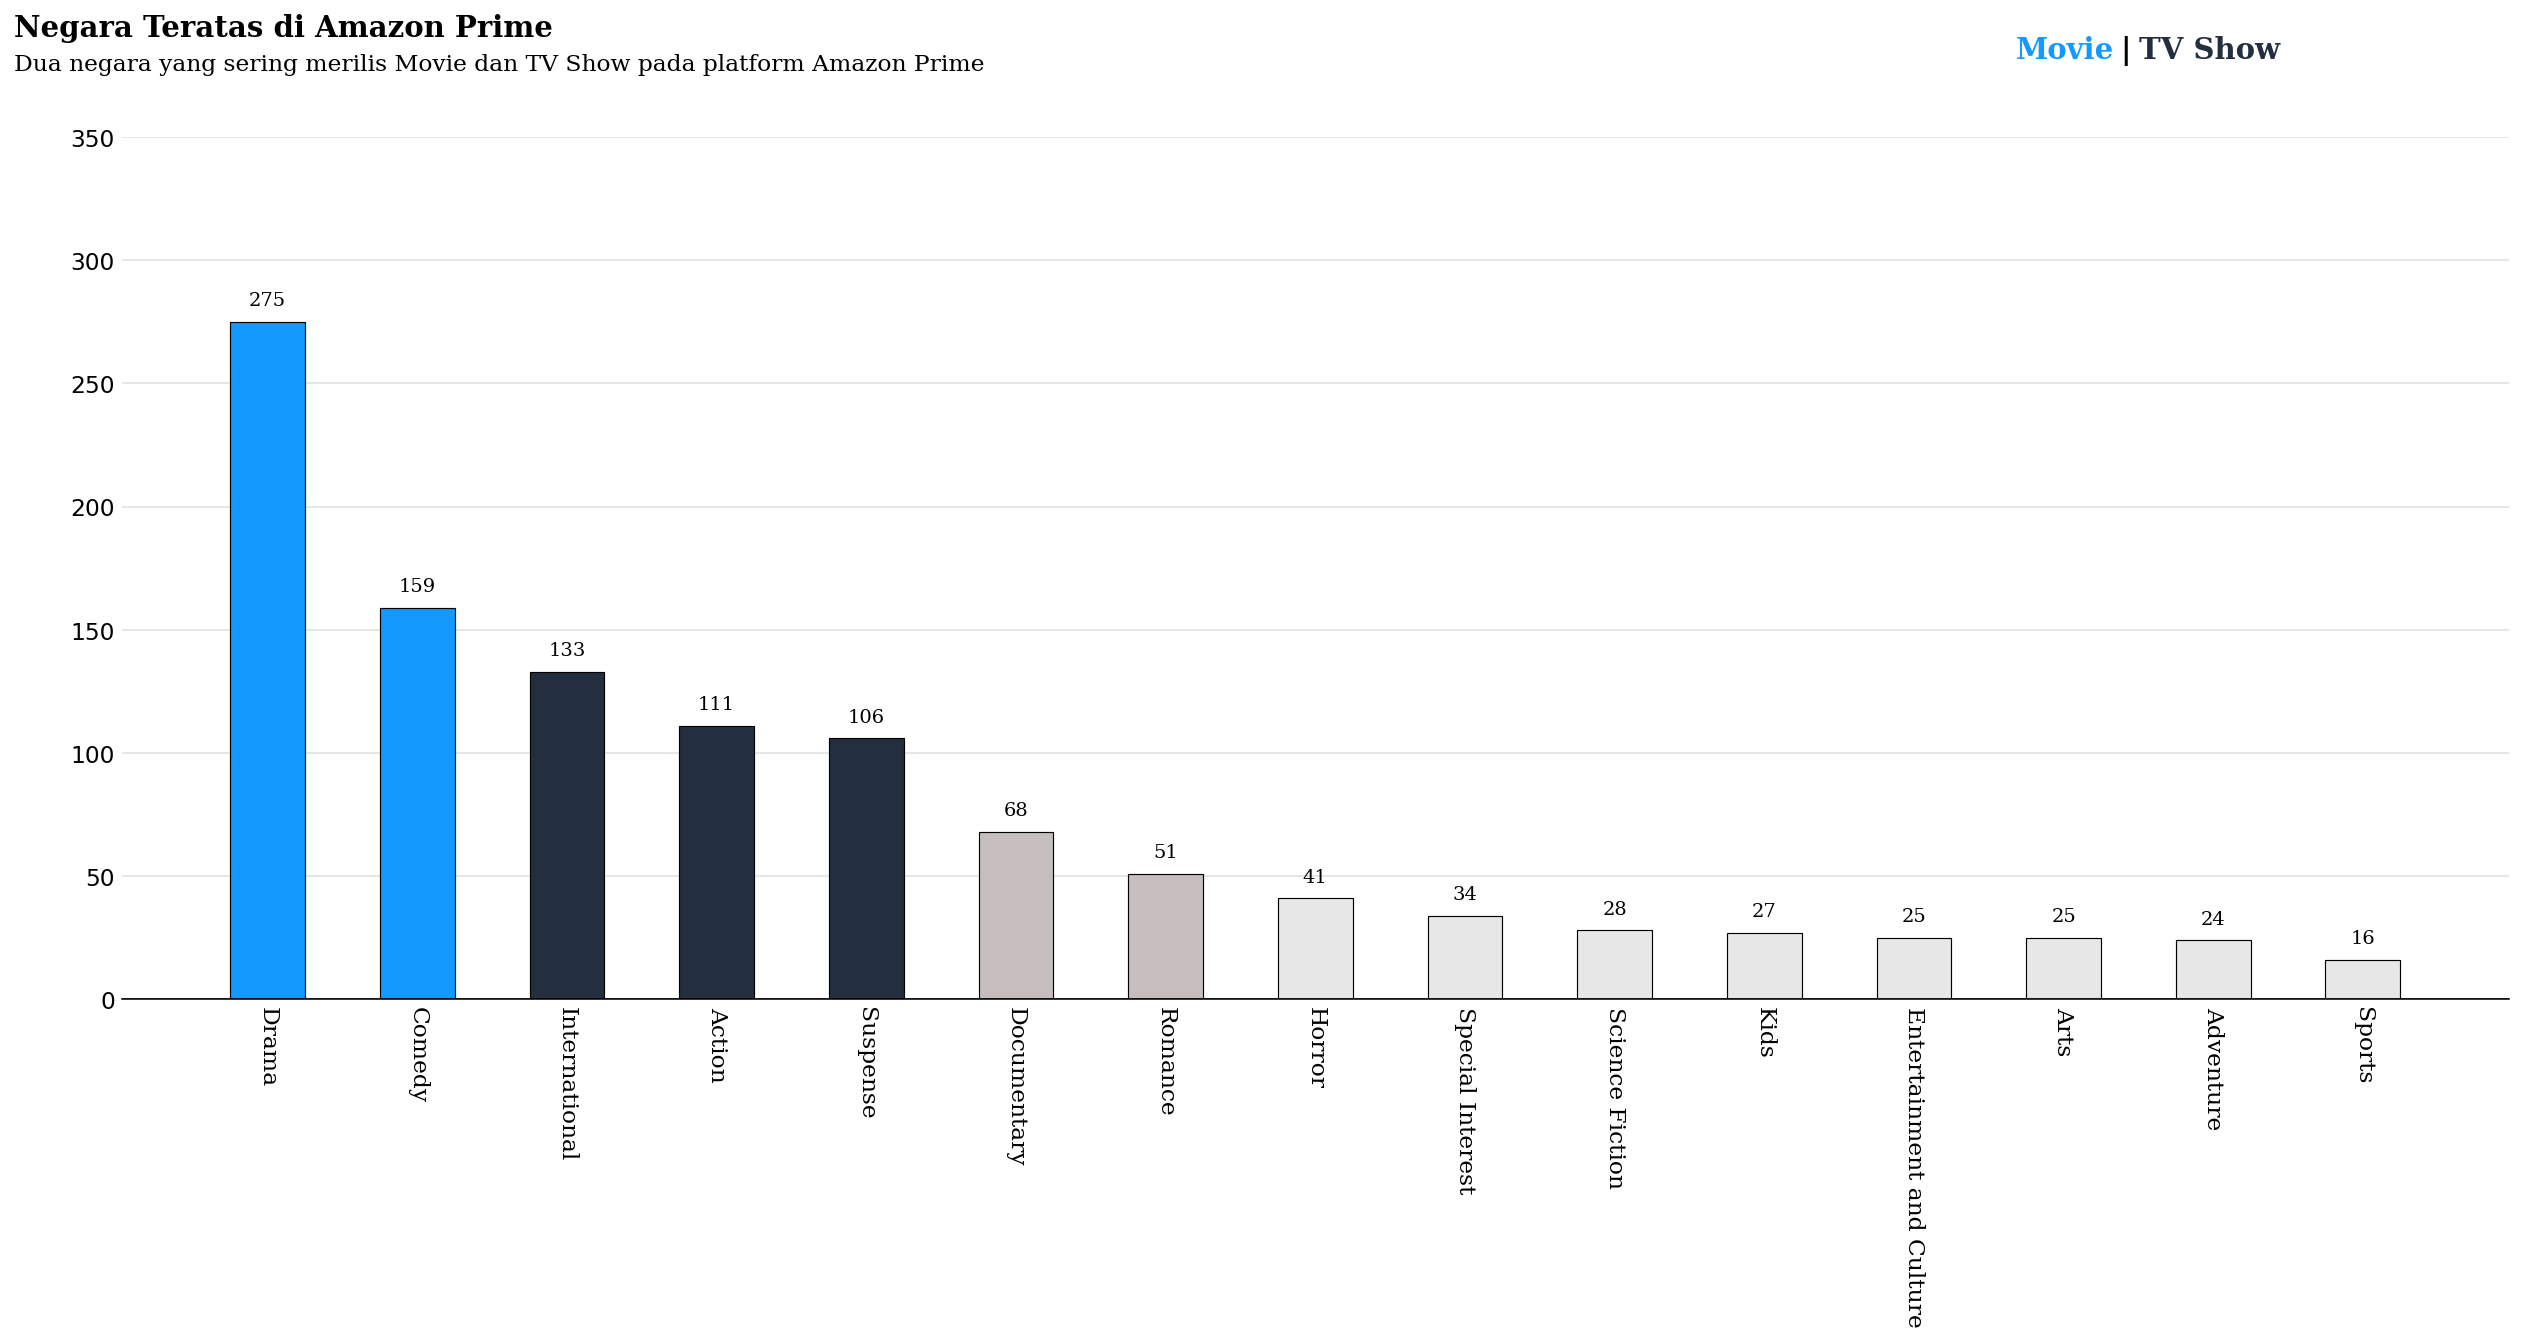

genre
Drama                        275
Comedy                       159
International                133
Action                       111
Suspense                     106
Documentary                   68
Romance                       51
Horror                        41
Special Interest              34
Science Fiction               28
Kids                          27
Entertainment and Culture     25
Arts                          25
Adventure                     24
Sports                        16
dtype: int64


In [16]:
df_melted = df.melt(id_vars=['type'], value_vars=['listed_in_1', 'listed_in_2', 'listed_in_3', 'listed_in_4'],
                    var_name='country_type', value_name='genre')

df_cntry_sum = df_melted.groupby(['genre', 'type']).size().unstack(fill_value=0).reset_index()
df_cntry_sum['total'] = df_cntry_sum['Movie'] + df_cntry_sum['TV Show']
df_cntry_sum = df_cntry_sum.sort_values(by='total', ascending=False).head(15)
df_cntry_sum.reset_index(drop=True, inplace=True)

df_cntry_sum.set_index('genre', inplace=True)
data = df_cntry_sum[['Movie', 'TV Show']].sum(axis=1)

# Plotting data
fig, ax = plt.subplots(1, 1, figsize=(22, 8))

# Pilih warna untuk bar (highlight top 3)
color_map = ['#E7E7E7' for _ in range(len(data))]
color_map[0] = color_map[1] = '#1399FF'
color_map[2] = color_map[3] = color_map[4] = '#232F3E'
color_map[5] = color_map[6] = '#c6bebe'

# Plot bar chart
bars = ax.bar(data.index, data, width=0.5, edgecolor='black', linewidth=0.6, color=color_map)

# Annotations untuk menambahkan nilai pada setiap bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(height)}", 
                xy=(bar.get_x() + bar.get_width() / 2, height + 5),  # Jarak lebih kecil
                va='bottom', ha='center',
                fontweight='light', fontfamily='serif')

# Remove border dari plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels untuk sumbu X
ax.set_xticklabels(data.index, fontfamily='serif', rotation=-90)

# Title dan sub-title
fig.text(0.09, 0.97, 'Negara Teratas di Amazon Prime', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.94, 'Dua negara yang sering merilis Movie dan TV Show pada platform Amazon Prime', fontsize=12, fontweight='light', fontfamily='serif')

# Grid garis pada sumbu Y
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Set y-ticks agar sesuai dengan range data
grid_y_ticks = np.arange(0, max(data) + 98, 50)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

fig.text(0.74,0.95,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#1399FF')
fig.text(0.774,0.95,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.78,0.95,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')

plt.show()

print(data)

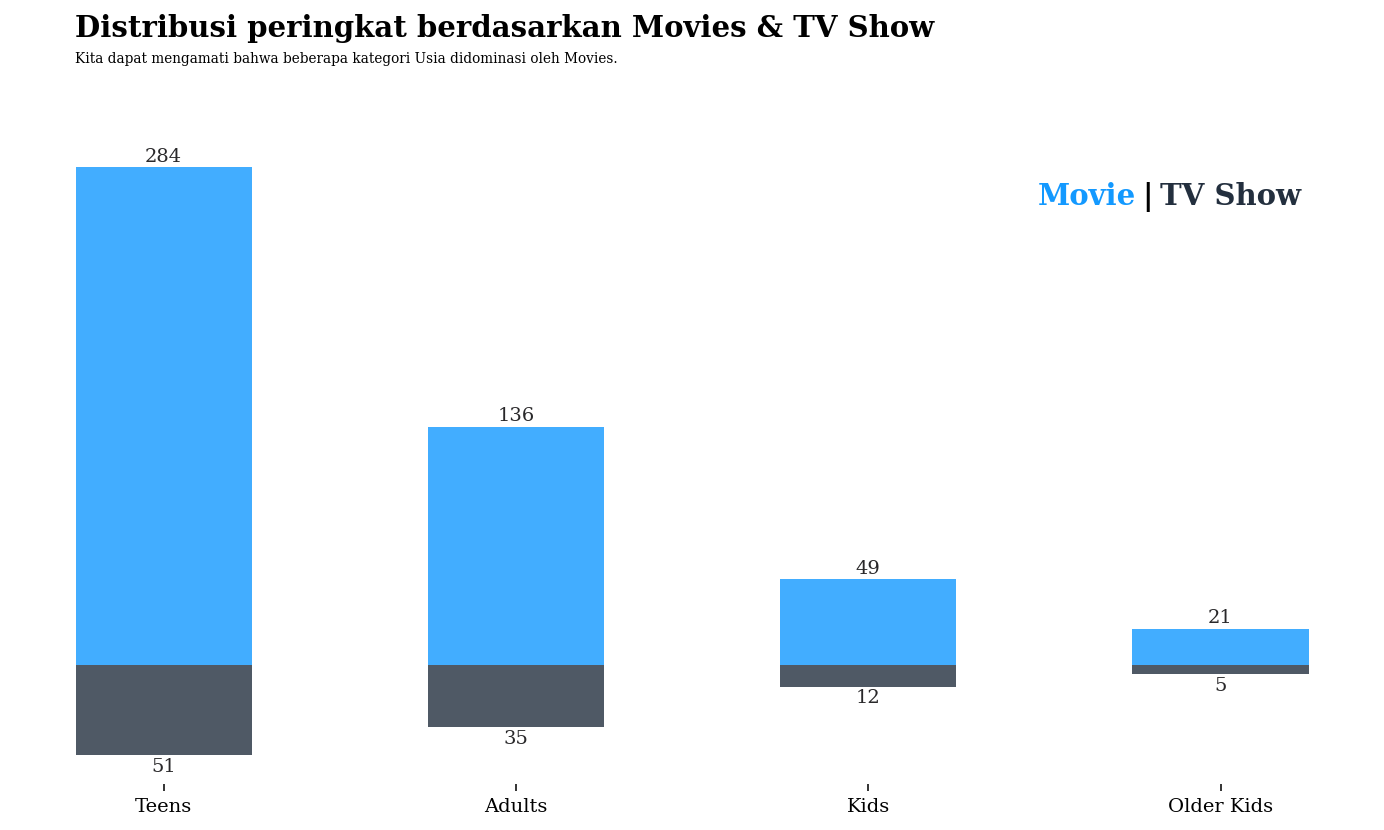

In [47]:

ratings_ages = {
    '13+': 'Teens',
    '18+': 'Adults',
    'ALL': 'Kids',
    'R': 'Adults',
    '16+': 'Teens',
    'G': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'PG': 'Older Kids',
    'TV-MA': 'Adults',
    '7+': 'Older Kids',
    'TV-G': 'Kids',
    'NOT_RATE': 'Adults'
}

df['rating'] = df['rating'].replace(ratings_ages)
rating_order = df['rating'].value_counts().index

mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12.5, 6))
ax.bar(movie.index, movie, width=0.5, color='#1399FF', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#232F3E', alpha=0.8, label='TV Show')
# ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 6.5),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#29282A')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 6),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#29282A')


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Distribusi peringkat berdasarkan Movies & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.16, 0.95, 
'''Kita dapat mengamati bahwa beberapa kategori Usia didominasi oleh Movies.
''', fontsize=7, fontweight='light', fontfamily='serif') 

fig.text(0.71,0.8,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#1399FF')
fig.text(0.77,0.8,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.78,0.8,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')


plt.show()


In [18]:
df[['country_1', 'country_2', 'country_3', 'country_4', 'country_5']] = df[['country_1', 'country_2', 'country_3', 'country_4', 'country_5']].replace('United States', 'USA')

us_ind = df[
    df[['country_1', 'country_2', 'country_3', 'country_4', 'country_5']]
    .isin(['USA', 'India'])
    .any(axis=1)
]

allcnrty = pd.melt(us_ind, id_vars=['release_year'], value_vars=['country_1', 'country_2', 'country_3', 'country_4', 'country_5'], value_name='first_country')
us_ind = pd.melt(us_ind, id_vars=['release_year'], value_vars=['country_1', 'country_2', 'country_3', 'country_4', 'country_5'], value_name='first_country')
us_ind = us_ind[us_ind['first_country'].isin(['USA', 'India'])]
data_sub = us_ind.groupby(['release_year', 'first_country']).size().unstack(fill_value=0)

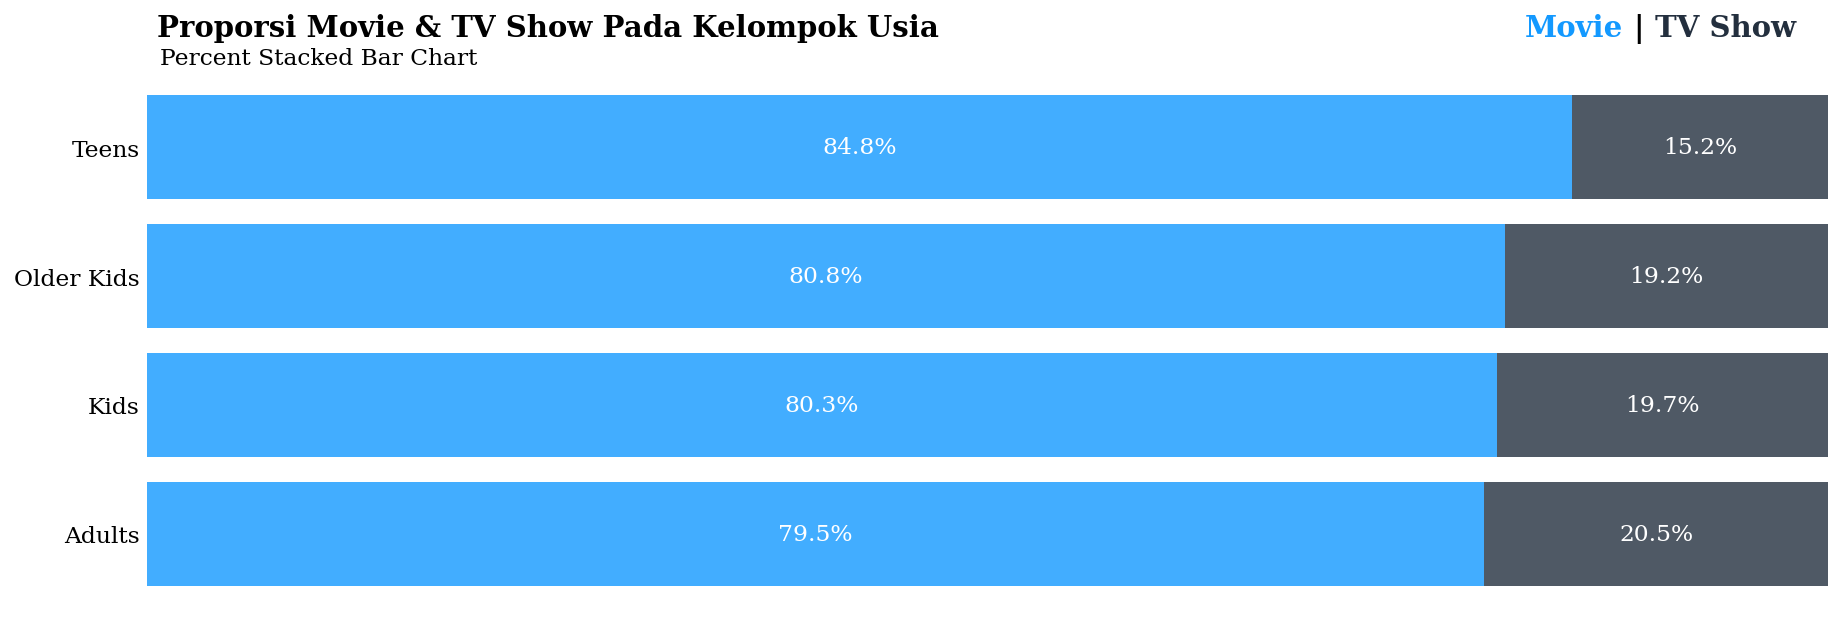

In [19]:
data_csdf = df[['type', 'rating']].groupby('rating')['type'].value_counts().unstack()
data_csdf = data_csdf.loc[rating_order].fillna(0)
data_csdf['sum'] = data_csdf.sum(axis=1)
data_csdf_ratio = (data_csdf.T / data_csdf['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

fig, ax = plt.subplots(1,1,figsize=(15.5, 5),)

ax.barh(data_csdf_ratio.index, data_csdf_ratio['Movie'], 
        color='#1399FF', alpha=0.8, label='Movie')
ax.barh(data_csdf_ratio.index, data_csdf_ratio['TV Show'], left=data_csdf_ratio['Movie'], 
        color='#232F3E', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_csdf_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_csdf_ratio.index:
    ax.annotate(f"{data_csdf_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_csdf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_csdf_ratio.index:
    ax.annotate(f"{data_csdf_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_csdf_ratio['Movie'][i]+data_csdf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Proporsi Movie & TV Show Pada Kelompok Usia', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.76,0.93,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#1399FF')
fig.text(0.81,0.93,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.93,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [20]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f1', '#146eb4','#1399FF'])

# membuat filter dan replace untuk jenis-jenis rating
xasx = df['target_ages'] = df['rating'].replace(ratings_ages)
xasx = df['target_ages'].unique()

countries = pd.concat([df['country_1'], df['country_2'], df['country_3'], df['country_4'], df['country_5']]).dropna()

# Menghitung jumlah kemunculan setiap negara
country_count = countries.value_counts().reset_index()
country_count.columns = ['first_country', 'count']

# Menampilkan 10 negara teratas berdasarkan jumlah kemunculannya
top_countries = country_count.head(10)['first_country']

# Replace 'United States' dengan 'USA', dan negara lainnya
country_count['first_country'].replace('United States', 'USA', inplace=True)
country_count['first_country'].replace('United Kingdom', 'UK', inplace=True)
country_count['first_country'].replace('South Korea', 'S. Korea', inplace=True)

# Membuat kolom 'first_country' berdasarkan 'country_1' di DataFrame asli
df['first_country'] = df['country_1']

# Replace 'United States' dengan 'USA', dan negara lainnya di kolom 'first_country'
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK', inplace=True)
df['first_country'].replace('South Korea', 'S. Korea', inplace=True)

df_heatmap = df.loc[df['first_country'].isin(top_countries)]
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

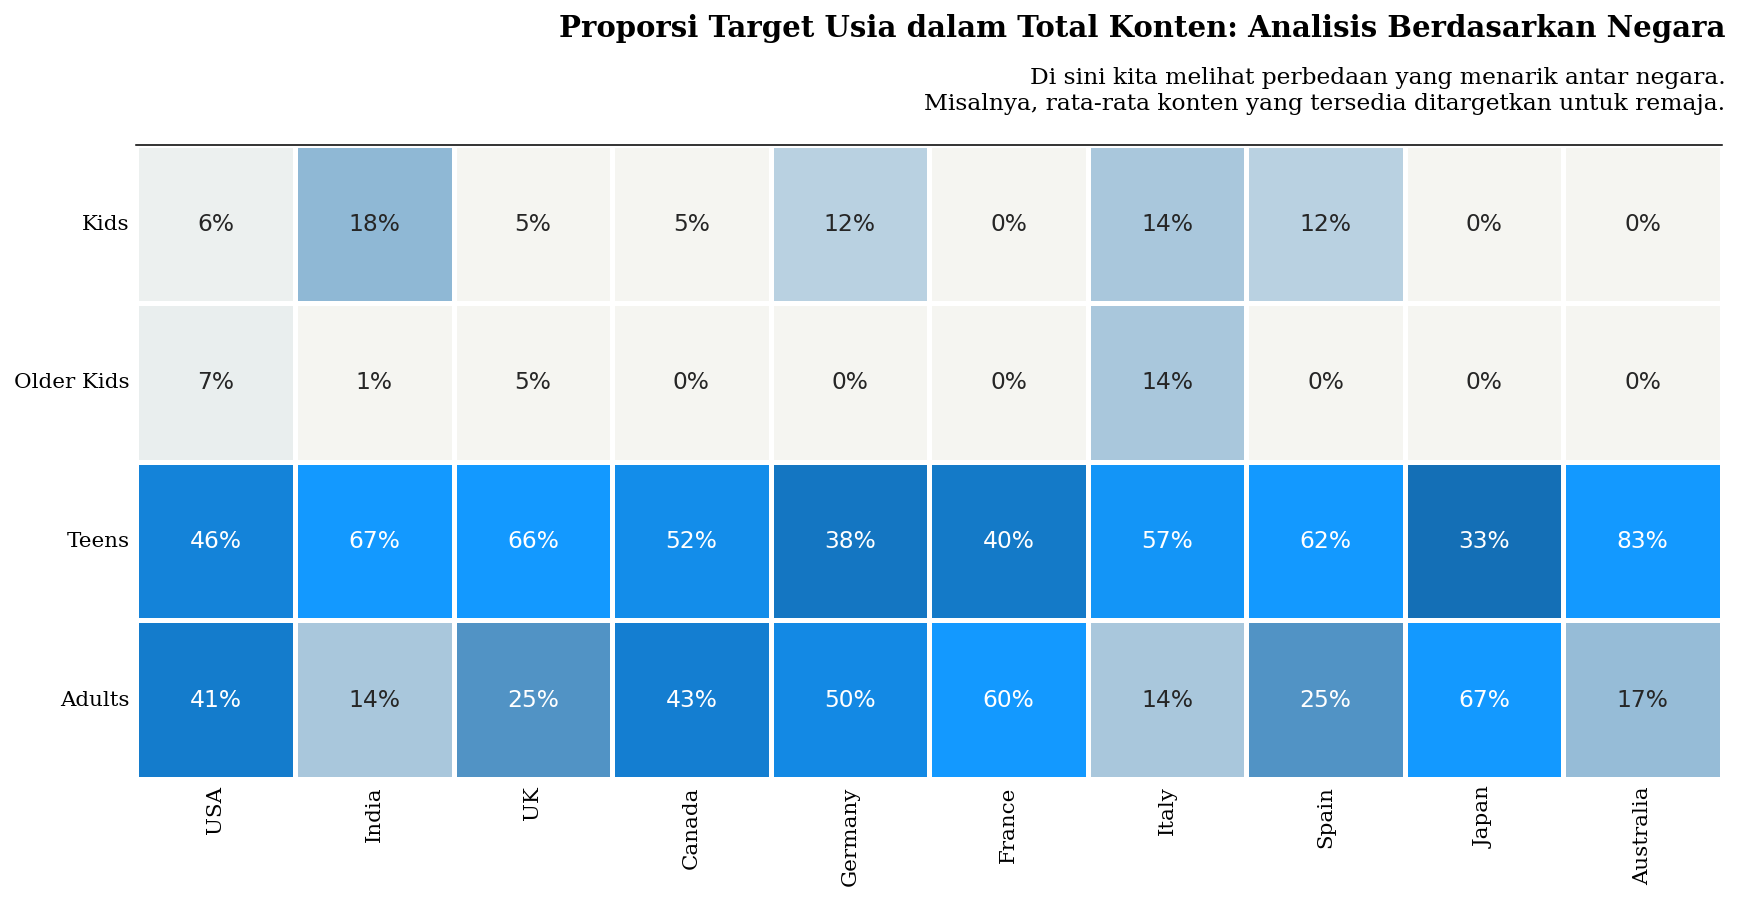

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12.5, 13.5))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Germany', 'France', 'Italy', 'Spain', 'Japan', 'Australia']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Proporsi Target Usia dalam Total Konten: Analisis Berdasarkan Negara', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   
fig.text(0.99, 0.7, 'Di sini kita melihat perbedaan yang menarik antar negara.',ha='right', fontsize=12,fontfamily='serif') 
fig.text(0.99, 0.6866, 'Misalnya, rata-rata konten yang tersedia ditargetkan untuk remaja.',ha='right', fontsize=12,fontfamily='serif')

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

In [22]:
# Gabungkan kolom genre dari beberapa kolom (listed_in_1, listed_in_2, listed_in_3, listed_in_4)
genre = pd.concat([df['listed_in_1'], df['listed_in_2'], df['listed_in_3'], df['listed_in_4']]).dropna()

# Menghitung jumlah kemunculan setiap genre
genre_count = genre.value_counts()

# Memberi nama kolom sesuai dengan format yang diinginkan
genre_count.columns = ['genre', 'count']

# Menampilkan hasil
print(genre_count)


Drama                        275
Comedy                       159
International                133
Action                       111
Suspense                     106
Documentary                   68
Romance                       51
Horror                        41
Special Interest              34
Science Fiction               28
Kids                          27
Arts                          25
Entertainment and Culture     25
Adventure                     24
Sports                        16
Unscripted                    12
Fantasy                       10
Arthouse                       9
Young Adult Audience           8
LGBTQ                          8
Animation                      7
Historical                     4
Music Videos and Concerts      4
TV Shows                       3
Military and War               3
Western                        3
Talk Show and Variety          1
Faith and Spirituality         1
Anime                          1
Name: count, dtype: int64


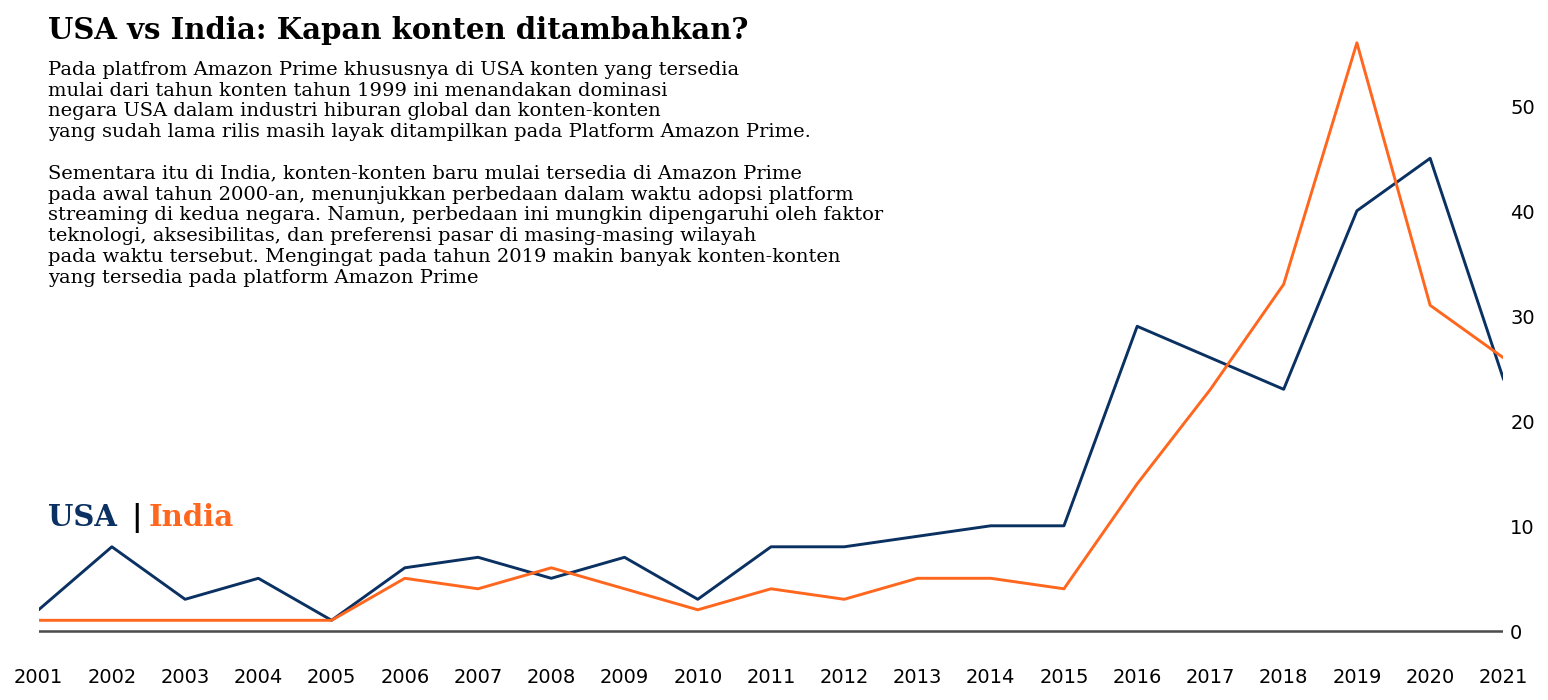

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(13.5, 6))
color = ["#0A3161", "#FF671F"]

for i, mtv in enumerate(us_ind['first_country'].value_counts().index):
    mtv_rel = data_sub[mtv]
    # ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    
ax.yaxis.tick_right()   
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2001,2021)
plt.xticks(np.arange(2001, 2022, 1))

fig.text(0.13, 0.85, 'USA vs India: Kapan konten ditambahkan?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.56, 
'''
Pada platfrom Amazon Prime khususnya di USA konten yang tersedia
mulai dari tahun konten tahun 1999 ini menandakan dominasi
negara USA dalam industri hiburan global dan konten-konten
yang sudah lama rilis masih layak ditampilkan pada Platform Amazon Prime.

Sementara itu di India, konten-konten baru mulai tersedia di Amazon Prime
pada awal tahun 2000-an, menunjukkan perbedaan dalam waktu adopsi platform
streaming di kedua negara. Namun, perbedaan ini mungkin dipengaruhi oleh faktor
teknologi, aksesibilitas, dan preferensi pasar di masing-masing wilayah
pada waktu tersebut. Mengingat pada tahun 2019 makin banyak konten-konten
yang tersedia pada platform Amazon Prime'''

, fontsize=10, fontweight='light', fontfamily='serif')

fig.text(0.13,0.27,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#0A3161')
fig.text(0.174,0.27,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.183,0.27,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#FF671F')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#00A8E1;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:#000000;
              text-align:center;'>
        <b>KESIMPULAN</b>
    </h3>
</div>
<h7>
Dari hasil analisis, kita dapat menyimpulkan bahwa penyebaran konten di platform Amazon Prime masih mendominasi Movies baik dari Kelompok Usia, sekitar 83% jenis konten Movies tersebar di seluruh negara, bahkan mendominasi di 8 negara.
<br><br>
Sementar penyebaran konten jenis Movies maupun TV Shows masih didominasi oleh negara USA dan India.
</h7>